<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli and Rajath Kumar Mysore Pradeep Kumar</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
from __future__ import print_function

%precision 6 
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas as pd


# Understanding the Singular Value Decomposition



## Factorizations:  A review

**Matrix Factorization** is a fundamental concept in Linear Algebra and refers to the ability to write general matrices as the products of simpler matrices with special properties.

In particular, all of the great algorithms encountered in numerical linear Algebra can be succinctly described by their factorizations.  Examples include

### **The LU decomposition**  
$$PA=LU$$
    
* **Algorithms** *Gaussian Elimination with partial pivoting* 
* **Factorization** $P$ Permutation matrix (from pivoting), $L,U$: Lower and upper triangular matrices
* **Application** direct solution of $A\mathbf{x}=\mathbf{b}$ for $A\in\mathbb{R}^{n\times n}$

### **The QR decomposition**  
$$A=QR$$
    
* **Algorithms** Gram-Schmidt Orthogonalization, Householder Triangularization 
* **Factorization**  $Q$:  Orthonormal Basis for $C(A)$, $R$: upper triangular matrix
* **Applications** Least-Squares solutions, Projection problems,  Eigenvalues $QR/RQ$

### **EigenProblems**  
$$ AX = X\Lambda, \quad (A\in\mathbb{R}^{n\times n})$$

* Diagonalizable matrices $A = X\Lambda X^{-1}$
* Hermitian/Symmetric Matrices $A = Q\Lambda Q^T$
* Schur Factorization $A = QTQ^T$
    
    
* **Algorithms**: Power Method, Inverse Power with shifts,  $QR/RQ$
* **Factorization**-- $X$, $Q$: matrix of Eigenvectors,  $\Lambda$ and diagonal matrix of eigenvalues 
* **Application** Solution of Dynamical systems,  Iterative Maps, Markov Chains,  Vibrational analysis$\ldots$, Quantum Mechanics

*But perhaps the most beautiful factorization, which contains aspects of all of these problems$\ldots$

## Singular Value Decomposition (SVD)
$$
    A = U\Sigma V^{T}
$$
for *any* $A\in\mathbb{R}^{m\times n}$, where
* $U \in \mathbb R^{m \times m}$ and is the orthogonal matrix whose columns are the eigenvectors of $AA^{T}$
* $V \in \mathbb R^{n \times n}$ and is the orthogonal matrix whose columns are the eigenvectors of $A^{T}A$
* $\Sigma \in \mathbb R^{m \times n}$ and is a diagonal matrix with elements $\sigma_{1}, \sigma_{2}, \sigma_{3}, ... \sigma_{r}$ where $r = rank(A)$ corresponding to the square roots of the eigenvalues of $A^{T}A$. They are called the singular values of $A$ and are positive arranged in descending order. ($\sigma_{1} \geq \sigma_{2} \geq \sigma_{3} \geq ... \sigma_{r} > 0$).



Or a picture is worth a thousand words...


### Existence and Uniqueness

Every matrix $A \in \mathbb{C}^{m \times n}$ has a singular value decomposition. Furthermore, the singular values $\{\sigma_{j}\}$ are uniquely determined, and if $A$ is square and the $\sigma_{j}$ are distinct, the left and right singular vectors $\{u_{j}\}$ and $\{v_{j}\}$ are uniquely determined up to complex signs (i.e., complex scalar factors of absolute value 1).

### Eigenvalue Decomposition vs. SVD Decomposition

Let the matrix $X$ contain the eigenvectors of $A$ which are linearly independent, then we can write a decomposition of the matrix $A$ as
$$
    A = X \Lambda X^{-1}.
$$

How does this differ from the SVD?
 - The basis of the SVD representation differs from the eigenvalue decomposition
   - The basis vectors are not in general orthogonal for the eigenvalue decomposition where it is for the SVD
   - The SVD effectively contains two basis sets.
 - All matrices have an SVD decomposition whereas not all have eigenvalue decompositions.

#### Applications
* Matrix Pseudo-Inverse for ill-conditions problems
* Principal Component analysis
* Total Least Squares
* Image Compression
* Data Analysis for interpretation of high-dimensional data
* and more$\ldots$

### A conceptual computation of the SVD (not how it's really done)

Given $A = U\Sigma V^T$, we can form the matrix 

$$
    A^TA = V\Sigma^T\Sigma V^T
$$

where $V\in\mathbb{R}^{n\times n}$ is unitary and
$$
    \Sigma^T\Sigma = \begin{bmatrix} 
                \sigma_1^2 & & &    \\
                    & \sigma_2^2 & & \\
                   & & \ddots &   \\
                   & & &   \sigma_n^2  \\ 
                                   \end{bmatrix}
$$ 

However, because $A^TA$ is clearly **Symmetric** it can also has the eigen factorization

$$
    A^TA = Q\Lambda Q^T
$$

where $Q$ is unitary and $\Lambda$ is real diagonal.  

Moreover, we can show that $A^T A$ is at least Positive semi-definite so all the eigenvalues are $\geq 0$. 

In particular,  if $\mathrm{rank}(A)=r$ we know that $r$ eigenvalues are $>0$ and $n-r$ eigenvalues are equal to zero.

Given that

$$\begin{align}
    A^TA &= V\Sigma^T\Sigma V^T \\
        &= Q\Lambda Q^T \\
\end{align}
$$

If we simply order the eigenvalues from largest to smallest (and rearrange the columns of $Q$ to match), then we can make the association

$$V = Q\quad, \Sigma^T\Sigma = \Lambda$$ or

$$\sigma_i^2 = \lambda_i\quad\textrm{or}\quad \sigma_i = \sqrt{\lambda_i}$$

A similar argument can be made about $U$ and the eigenvectors of $AA^T$,  however, a better way to think about the relationship between $U$, $V$ and $\Sigma$ is to rearrange the SVD as

$$ 
    AV = U\Sigma
$$

or we can look at this column-by-column 

$$
    A\mathbf{v}_i = \sigma_i\mathbf{u}_i
$$

(in the same way the Eigen decomposition $AX = X\Lambda$ is equivalent to $A\mathbf{x}_i = \lambda_i\mathbf{x}_i$)

or rearranging 
$$
    \mathbf{u}_i = \frac{A\mathbf{v}_i}{\sigma_i},\quad i=1,2,\ldots,r
$$

lets us solve for the first $r$ columns of $U$ given $V$ and $\Sigma$.  

As we'll show, we usually don't need to solve for the remaing $m-r$ columns of $U$ for reasons that relate to the "4 fundamental subspaces of $A$"

### The Strangian view of the 4 Subspaces: a quick refresher

<img align=center src="./images/Strang_4_subspaces.png">

### The Big idea:  The columns of $U$ and $V$ contain orthonormal bases for the 4 fundamental subspaces

Returning to $AV = U\Sigma$ it follows that 

$$
\begin{align}
        A\mathbf{v}_i &= \sigma_i\mathbf{u_i},\quad\mathrm{for}\quad i=1,2\ldots r \\
        A\mathbf{v}_i &= \mathbf{0},\quad\mathrm{for}\quad i=r+1,\ldots n \\
\end{align}
$$

Therefore the last $n-r$ columns of $V$ must be in the Null space of $A$, and in fact must form an orthonormal basis for the Null space $N(A)$.  

Since the first $r$ columns of $V$ are all orthogonal to the last $n-r$ columns,  they must form an orthonormal basis for the row space $C(A^T)$.

Likewise,  since the first $r$ columns of $U$ satisfy

$$
    \mathbf{u}_i = \frac{A\mathbf{v}_i}{\sigma_i},\quad i=1,2,\ldots,r
$$

they must form an orthonormal basis for $C(A)$

Leaving only the last $m-r$ columns of $U$ as an orthonormal basis for the left null space $N(A^T)$

Again a picture is worth a lot here

$$
A\begin{bmatrix} &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 \mathbf{v}_1 & \cdots & \mathbf{v}_r & | &\mathbf{v}_{r+1} & \cdots & \mathbf{v}_n \\
 &  &  & |&  &  &  \\
  &  &  & |&  &  &  \\
   \end{bmatrix} = \begin{bmatrix} &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 \mathbf{u}_1 & \cdots & \mathbf{u}_r & | &\mathbf{u}_{r+1} & \cdots & \mathbf{u}_m \\
 &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
  &  &  & |&  &  &  \\
    \end{bmatrix} \begin{bmatrix} \sigma_1 &  &  & |  &  &    \\
 & \ddots &  & |   &   \mathbf{0}  \\
 &  & \sigma_r &|    &     \\
 -&- &-  & | & - &  -\\
 & \mathbf{0} &  & |   & \mathbf{0}   \\
 &  &  & |  &    \\
  &  &  & |  &     \\
    \end{bmatrix} 
$$


## The Economy (or Skinny) SVD

As it turns out, because of all the 0's  all we actually need to reconstruct $A$ is the the first $r$ columns of $U$, and $V$,  and the square sub-block of $\Sigma$ with just the singular values.  i.e.

$$
A\begin{bmatrix} &  &  & \\
 &  &  &    \\
 \mathbf{v}_1 & \cdots & \mathbf{v}_r   \\
 &  &  &   \\
  &  &  &    \\
   \end{bmatrix} = \begin{bmatrix} &  &  &   \\
 &  &  &    \\
  &  &  &    \\ 
 \mathbf{u}_1 & \cdots & \mathbf{u}_r     \\
 &  &  &    \\
 &  &  &    \\
  &  &  &    \\
    \end{bmatrix} \begin{bmatrix} \sigma_1 &  &        \\
 & \ddots &    \\
 &  & \sigma_r       \\
    \end{bmatrix} 
$$
or

$$
    A = U_r\Sigma_r V_r^T
$$

And it is this object (The Economy (or Skinny) SVD), that helps us understand what the SVD does.

### Spectral Theorem

The Economy SVD can also be written as 
$$
    A = U_r\Sigma_r V_r^T = \sum_{i=1}^r \sigma_i \mathbf{u}_i\mathbf{v}^T_i
$$

Which says we can expand $A$ as a series of rank-1 matrices $\mathbf{u}_i\mathbf{v}^T_i$ weighted by the singular values...

and it is this picture that leads to many of the important approximating properties of the SVD.

### Matrix Multiplication 

Consider the Matrix Vector product $A\mathbf{x}$ which maps a vector $\mathbf{x}\in\mathbb{R}^n$ to its image in column space $C(A)$.  In the context of the Economy SVD
$$
    A\mathbf{x} = U_r\Sigma_r V_r^T\mathbf{x}
$$


or (since $V_r^TV_r = I$)
$$ 
    A\mathbf{x} = U_r\Sigma_r (V_r^T V_r) V_r^T\mathbf{x} 
$$

or
$$
\begin{align}
    A\mathbf{x} &=  (U_r\Sigma_r V_r^T) (V_r V_r^T)\mathbf{x} \\
    & = A \mathbf{x}^+ 
\end{align}
$$
where $$\mathbf{x}^+ = (V_r V_r^T)\mathbf{x}$$
is the projection of $\mathbf{x}$ onto the row space $C(A^T)$

**Question**: If we wanted it, how would we  find the projection of $\mathbf{x}$ onto the Null space of $A$?

### SVD and the Matrix Inverse 

If a matrix is square and invertible, it implies that $m=n=r$ and $U$, $\Sigma$ and $V$ are all square invertible matrices,  therefore if 

$$
    A = U\Sigma V^T
$$
then

$$
    A^{-1} = V\Sigma^{-1} U^T
$$
where 
$$
    \Sigma^{-1} = \begin{bmatrix} 1/\sigma_1 &  &    &    \\
 & 1/\sigma_2 &   & \\
  &   &  \ddots &  \\
 &  &  & 1/\sigma_n       \\
    \end{bmatrix} 
$$

and clearly 
$$
    A^{-1}\mathbf{b} = \mathbf{x}
$$ 
maps any vector $\mathbf{b}\in C(A)$ back to a unique vector $\mathbf{x}\in C(A^T)$

### SVD and the Matrix Pseudo-Inverse 

But suppose $A$ is not square.  Then it cannot have an inverse,  however, the SVD allows us to define a "Pseudo-Inverse"

Given, the skinny SVD

$$
    A = U_r\Sigma_r V_r^T
$$

we can define

$$
    A^{+} = V_r \Sigma_r^{-1} U_r^T
$$

because $\Sigma_r$ is square and invertible (but its size is set by the rank $r$)

### Action of the  Pseudo-Inverse 

In general, if $A$ is rank deficient ($r<\min(m,n)$),  the problem $A\mathbf{x} = \mathbf{b}$ has either no solution or an infinite number of solutions.  However, it always has a minimal least squares solution given by 

$$
    x^{+} = A^{+}\mathbf{b}
$$

which maps any vector $\mathbf{b}\in \mathbb{R}^m$ to a unique vector $\mathbf{x}^+\in C(A^T)$

As we did with $A\mathbf{x}$, we can consider the action of because $A^{+}$ on any vector $\mathbf{b}$ as a projection problem.

$$
\begin{align}
    A^{+}\mathbf{b} &= V_r\Sigma^{-1}_r U_r^T\mathbf{b} \\
\end{align}
$$

$$
\begin{align}
  \hspace{5em}  &= V_r\Sigma^{-1}_r (U_r^T U_r) U_r^T\mathbf{b} \\
    & = (V_r\Sigma^{-1}_r U_r^T) (U_r U_r^T)\mathbf{b} \\
    & = A^{+} \mathbf{p}  
\end{align}
$$


where $$\mathbf{p}  = (U_r U_r^T)\mathbf{b}$$
is projection of $\mathbf{b}$ onto $C(A)$

### The minimal Least-Squares solution

It should be clear that 
$$
    \mathbf{x}^+ = A^{+}\mathbf{b}
$$ 
lies entirely in the Row space of $A$ (Why?)

Therefore it has no component in the $N(A)$ and is the shortest solution to $A\hat{\mathbf{x}}=\mathbf{p}$ which is the least squares problem

### The Pseudo-Inverse and ill-conditioned problems

Technically, a square matrix is either invertible or singular,  however, in many real problems, a matrix can be close to singular or "ill-conditioned".

Again, the condition number of a matrix defined by an induced $p$ norm is
$$
    \kappa_p(A) = ||A||_p ||A^{-1}||_p
$$

In particular,  for $p=2$, it is easy to show (using the SVD) that for a square matrix
$$
    \kappa_2(A) =\frac{\sigma_1}{\sigma_n}
$$

and thus for a singular matrix with $r<n$, $\kappa_2 =\infty$.

###  ill-conditioned matrices

However, it is possible that while $\sigma_n>0$,  it is significantly smaller than $\sigma_1$, leading to a very large condition number.  In particular if the last $j$ singular values are very small, it suggest that the matrix has a "near Null Space",  with a basis defined by the last $j$ columns of $V$.  Thus, while strictly invertible,  if a direct solver is used to solve

$$
A\mathbf{x} =\mathbf{b}
$$ 

any component in the near null space will be amplified by $1/\sigma_j$ and completely pollute your answer.

However, a useful fix can be to approximate $A$ as a lower rank matrix 

$$A_k = U_k\Sigma_kV_k^T$$

which just keeps the first $k$ singular values (i.e. pretends $r=k$).  If chosen wisely,  The approximate solution

$$
    \mathbf{x}^{+} = A^{+}_k\mathbf{b}
$$ 

can be considerably more accurate as it does not allow the near-null space to contaminate the solution.

# Examples

### Full SVD example

Consider the matrix
$$
    A = \begin{bmatrix} 
        2 & 0 & 3 \\
        5 & 7 & 1 \\
        0 & 6 & 2 
    \end{bmatrix}.
$$
Confirm the SVD representation using `numpy` functions as appropriate.

In [2]:
A = numpy.array([
    [2.0, 0.0, 3.0],
    [5.0, 7.0, 1.0],
    [0.0, 6.0, 2.0]
])

U, sigma, V_T = numpy.linalg.svd(A, full_matrices=True)

In [3]:
print('U:\n{}\n'.format(U))
print('Sigma:\n{}\n'.format(numpy.diag(sigma)))
print('V:\n{}\n'.format(V_T.T))


U:
[[-0.1487332   0.75154643  0.64269463]
 [-0.82032014  0.26917173 -0.50460029]
 [-0.55222577 -0.60226617  0.5764739 ]]

Sigma:
[[10.34297385  0.          0.        ]
 [ 0.          3.58438666  0.        ]
 [ 0.          0.          2.85920692]]

V:
[[-0.42531937  0.7948226  -0.43285156]
 [-0.87553113 -0.48248001 -0.02565698]
 [-0.22923497  0.36806261  0.90110002]]



In [4]:
Aprime = numpy.dot(U, numpy.dot(numpy.diag(sigma), V_T))
print('A - USV^T:\n{}'.format(A - Aprime))

A - USV^T:
[[ 0.00000000e+00  1.14999890e-15  4.44089210e-16]
 [ 8.88178420e-16  7.10542736e-15 -4.44089210e-16]
 [ 1.70453493e-15  4.44089210e-15  1.11022302e-15]]


#### Example: a rank-1 Matrix 

$$A = \mathbf{x}\mathbf{y}^T$$

In [5]:
x = numpy.array([ 1., 2., 1. ])
y = numpy.array([2., -1., 1. ])
A = numpy.outer(x,y)
print('A:\n{}\n'.format(A))
U, sigma, V_T = numpy.linalg.svd(A, full_matrices=False)

A:
[[ 2. -1.  1.]
 [ 4. -2.  2.]
 [ 2. -1.  1.]]



In [6]:
print('U:\n{}\n'.format(U))
print('sigma:\n{}\n'.format(sigma))
print('V:\n{}\n'.format(V_T.T))

U:
[[-0.40824829  0.91287093  0.        ]
 [-0.81649658 -0.36514837 -0.4472136 ]
 [-0.40824829 -0.18257419  0.89442719]]

sigma:
[6.00000000e+00 5.73316705e-16 1.09476443e-47]

V:
[[-0.81649658 -0.57735027 -0.        ]
 [ 0.40824829 -0.57735027 -0.70710678]
 [-0.40824829  0.57735027 -0.70710678]]



In [7]:
Aprime = numpy.dot(U, numpy.dot(numpy.diag(sigma), V_T))
print('A - USV^T:\n{}'.format(A - Aprime))

A - USV^T:
[[ 0.00000000e+00  1.11022302e-15 -1.11022302e-15]
 [ 0.00000000e+00  1.33226763e-15 -1.33226763e-15]
 [ 0.00000000e+00  6.66133815e-16 -6.66133815e-16]]


In [8]:
# rank-1 reconstruction
k = 1
A1 = numpy.dot(U[:,:k], numpy.dot(numpy.diag(sigma[:k]), V_T[:k,:]))
print('A_k =\n{}\n'.format(A1))
print('A - A_k:\n{}'.format(A - A1))

A_k =
[[ 2. -1.  1.]
 [ 4. -2.  2.]
 [ 2. -1.  1.]]

A - A_k:
[[-4.44089210e-16  8.88178420e-16 -8.88178420e-16]
 [ 0.00000000e+00  1.33226763e-15 -1.33226763e-15]
 [ 0.00000000e+00  6.66133815e-16 -6.66133815e-16]]


### An ill-conditioned example

Consider the matrix
$$
    A = \begin{bmatrix} 
        1 & 0 & 1 \\
        1 & 1 & 2+\epsilon \\
        0 & 1 & 1\\
    \end{bmatrix}.
$$
where the last column is almost the sum of the first two.

In [9]:
epsilon = 1.e-5
A = numpy.array([
    [1.0, 0.0, 1.0],
    [1.0, 1.0, 2+epsilon],
    [0.0, 1.0, 1.0]
])

U, S, V_T = numpy.linalg.svd(A)

In [10]:
print('U:\n{}\n'.format(U))
print('S:\n{}\n'.format(S))
print('V:\n{}\n'.format(V_T.T))
print('sigma_1/sigma_n = {}, cond_2(A) = {}'.format(S[0]/S[2], numpy.linalg.cond(A, p=2)))

U:
[[-4.08247383e-01  7.07106781e-01  5.77350911e-01]
 [-8.16497488e-01  1.66533454e-16 -5.77348986e-01]
 [-4.08247383e-01 -7.07106781e-01  5.77350911e-01]]

S:
[3.00000667e+00 1.00000000e+00 3.33332593e-06]

V:
[[-4.08247383e-01  7.07106781e-01  5.77350911e-01]
 [-4.08247383e-01 -7.07106781e-01  5.77350911e-01]
 [-8.16497488e-01 -3.33066907e-16 -5.77348986e-01]]

sigma_1/sigma_n = 900003.9999747368, cond_2(A) = 900003.9999747367


### Try to solve $A\mathbf{x}=\mathbf{b}$

In [11]:
epsilon = 5*numpy.finfo(numpy.float64).eps
A = numpy.array([
    [1.0, 0.0, 1.0],
    [1.0, 1.0, 2+epsilon],
    [0.0, 1.0, 1.0]
])
x_true = numpy.array([1., 2., 3.])
b = A.dot(x_true)

In [12]:
x = numpy.linalg.solve(A,b)
print('x = {}: cond(A)={}, S ={}'.format(x, numpy.linalg.cond(A, p=2), S))

x = [0. 1. 4.]: cond(A)=7400169317648044.0, S =[3.00000667e+00 1.00000000e+00 3.33332593e-06]


### Rank 2 reconstruction

In [13]:
U, S, VT = numpy.linalg.svd(A)
k = 2
A2 = numpy.dot(U[:,:k], numpy.dot(numpy.diag(S[:k]), VT[:k,:]))
#Pseudo Inverse
Ap2 = numpy.dot(VT.T[:,:k], numpy.dot(numpy.diag(1./S[:k]), U.T[:k,:]))

In [14]:
xp = Ap2.dot(b)
print('x_true\t= {}'.format(x_true))
print('x^+ \t= {}'.format(xp))
print('x \t= {}: '.format(numpy.linalg.solve(A,b)))


x_true	= [1. 2. 3.]
x^+ 	= [1. 2. 3.]
x 	= [0. 1. 4.]: 


## Review:  the Singular Value Decomposition (SVD)
$$
    A = U\Sigma V^{T}
$$
for *any* $A\in\mathbb{R}^{m\times n}$, where
* $U \in \mathbb R^{m \times m}$ and is the orthogonal matrix whose columns are the eigenvectors of $AA^{T}$
* $V \in \mathbb R^{n \times n}$ and is the orthogonal matrix whose columns are the eigenvectors of $A^{T}A$
* $\Sigma \in \mathbb R^{m \times n}$ and is a diagonal matrix with elements $\sigma_{1}, \sigma_{2}, \sigma_{3}, ... \sigma_{r}$ where $r = rank(A)$ corresponding to the square roots of the eigenvalues of $A^{T}A$. They are called the singular values of $A$ and are positive arranged in descending order. ($\sigma_{1} \geq \sigma_{2} \geq \sigma_{3} \geq ... \sigma_{r} > 0$).



Again a picture is worth a lot here

$$
A\begin{bmatrix} &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 \mathbf{v}_1 & \cdots & \mathbf{v}_r & | &\mathbf{v}_{r+1} & \cdots & \mathbf{v}_n \\
 &  &  & |&  &  &  \\
  &  &  & |&  &  &  \\
   \end{bmatrix} = \begin{bmatrix} &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
 \mathbf{u}_1 & \cdots & \mathbf{u}_r & | &\mathbf{u}_{r+1} & \cdots & \mathbf{u}_m \\
 &  &  & |&  &  &  \\
 &  &  & |&  &  &  \\
  &  &  & |&  &  &  \\
    \end{bmatrix} \begin{bmatrix} \sigma_1 &  &  & |  &  &    \\
 & \ddots &  & |   &   \mathbf{0}  \\
 &  & \sigma_r &|    &     \\
 -&- &-  & | & - &  -\\
 & \mathbf{0} &  & |   & \mathbf{0}   \\
 &  &  & |  &    \\
  &  &  & |  &     \\
    \end{bmatrix} 
$$


### $U$ and $V$ contain orthonormal bases for the 4 subspaces of $A$

* The first $r$ columns of $U$ form an orthonormal bases for $C(A)\in\mathbb{R}^m$
* The first $r$ columns of $V$ form an orthonormal bases for $C(A^T)\in\mathbb{R}^n$
* The last $n-r$ columns of $V$ form an orthonormal basis for $N(A)\in\mathbb{R}^n$
* The last $m-r$ columns of $U$ form an orthonormal basis for $N(A^T)\in\mathbb{R}^m$

## The Economy (or Skinny) SVD

As it turns out, because of all the 0's  all we actually need to reconstruct $A$ is the the first $r$ columns of $U$, and $V$,  and the square sub-block of $\Sigma$ with just the singular values.  i.e.

$$
A\begin{bmatrix} &  &  & \\
 &  &  &    \\
 \mathbf{v}_1 & \cdots & \mathbf{v}_r   \\
 &  &  &   \\
  &  &  &    \\
   \end{bmatrix} = \begin{bmatrix} &  &  &   \\
 &  &  &    \\
  &  &  &    \\ 
 \mathbf{u}_1 & \cdots & \mathbf{u}_r     \\
 &  &  &    \\
 &  &  &    \\
  &  &  &    \\
    \end{bmatrix} \begin{bmatrix} \sigma_1 &  &        \\
 & \ddots &    \\
 &  & \sigma_r       \\
    \end{bmatrix} 
$$

* $V_rV_r^T$ is an orthogonal projector onto $C(A^T)$ 
* $(I - V_rV_r^T)$ projects onto $N(A)$
* $U_rU_r^T$ is an orthogonal projector onto $C(A)$
* $(I - U_rU_r^T)$ projects onto $N(A^T)$

## The Pseudo-Inverse

Given the SVD,  every matrix $A\in\mathbb{R}^{m\times n}$  has a 'pseudo-inverse'

$$
    A^{+} = V_r\Sigma_r^{-1}U_r^T
$$

with the properties
* if $A\in\mathbb{R}^{n\times n}$ and $r=n$, then $A^{+}=A^{-1}$
* $\mathbf{x}^+ = A^{+}\mathbf{b}$ is always the shortest least squares solution s.t. $(I - V_rV_r^T)\mathbf{x}^+=\mathbf{0}$
* $AA^+$ projects $\mathbf{b}$ onto ______?
* $A^+A$ projects $\mathbf{x}$ onto ______?

### Matrix Properties via the SVD

 - The $\text{rank}(A) = r$ where $r$ is the number of non-zero singular values.
 - The $\text{range}(A) = \mathrm{span}\langle u_1, ... , u_r\rangle$ and $\text{null}(a) = \mathrm{span}\langle v_{r+1}, ... , v_n\rangle$.
 - The $|| A ||_2 = \sigma_1$ and $||A||_F = \sqrt{\sigma_{1}^{2}+\sigma_{2}^{2}+...+\sigma_{r}^{2}}$.
 - The nonzero singular values of A are the square roots of the nonzero eigenvalues of $A^{T}A$ or $AA^{T}$.
 - If $A = A^{T}$, then the singular values of $A$ are the absolute values of the eigenvalues of $A$.
 - For $A \in \mathbb{C}^{m \times m}$ then $|det(A)| = \Pi_{i=1}^{m} \sigma_{i}$

### Low-Rank Approximations

 - $A$ is the sum of the $r$ rank-one matrices:
$$
    A = U \Sigma V^T = \sum_{j=1}^{r} \sigma_{j}u_{j}v_{j}^{T}
$$
 - For any $k$ with $0 \leq k \leq r$, define
$$
    A_{k} = \sum_{j=1}^{k} \sigma_{j}u_{j}v_{j}^{T}
$$

then 

$$
     ||A - A_{k}||_{2} = ||\sum_{j=k+1}^{r} \sigma_{j}u_{j}v_{j}^{T}||_{2} = \sigma_{k+1}
$$

It can then be shown that for all matrices $B\in \mathbb{C}^{m \times n}$ with rank $k\leq r$, then

$$
    ||A - A_{k}||_{2} \leq || A-B||_{2}  
$$

i.e. that $A_k$ is the best rank-k approximation to $A$ in the 2-norm.

A similar result can be shown for the Frobenious norm

- For any $k$ with $0 \leq k \leq r$, the matrix $A_{k}$ also satisfies

$$
    ||A - A_{k}||_{F} = \text{inf}_{B \in \mathbb{C}^{m \times n}} \text{rank}(B)\leq v ||A-B||_{F} = \sqrt{\sigma_{v+1}^{2} + ... + \sigma_{r}^{2}}
$$

## Example:   Image compression

How does this work in practice?

### the original Matrix (From Durer's Melancholia)

<img align=center src="./images/Durer_Melancholia_I.jpg" width=600>

In [15]:
from matplotlib import image
data = image.imread('images/melancholia-magic-square.png')
m,n = data.shape

453x457 pixel image


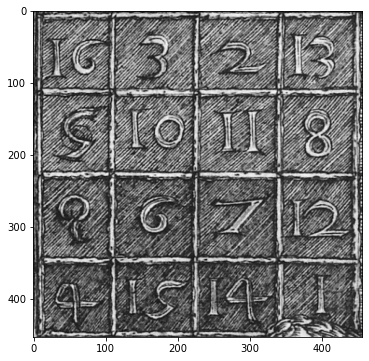

In [16]:
print('{}x{} pixel image'.format(m,n))
plt.figure(figsize=(8,6))
plt.imshow(data,cmap='gray')
plt.show()

In [17]:
u, s, vt = numpy.linalg.svd(data)

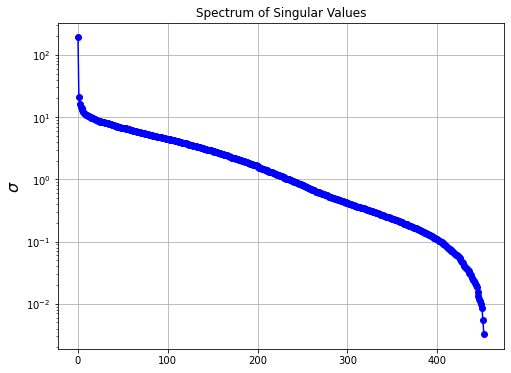

In [18]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(s,'bo-')
axes.set_ylabel('$\sigma$', fontsize=16)
axes.grid()
axes.set_title('Spectrum of Singular Values')
plt.show()

### First 4 Modes

where mode $i$ is the rank-1 matrix $\sigma_i\mathbf{u}_i\mathbf{v}_i^T$

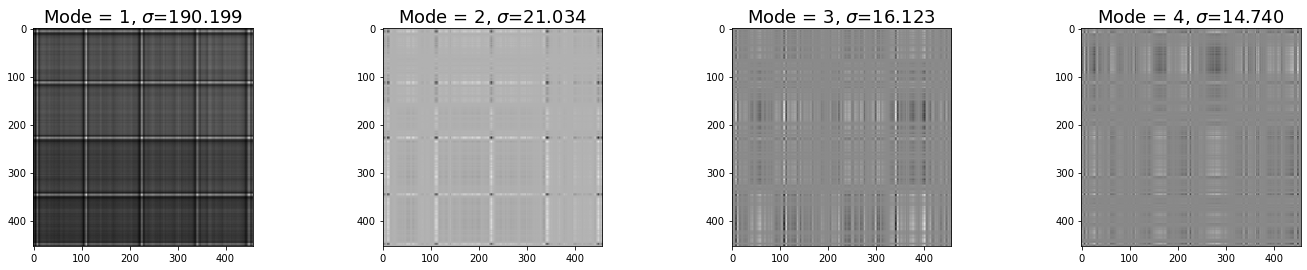

In [19]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 1)
for i in range(4):
    mode = s[i]*numpy.outer(u[:,i], vt[i,:])

    axes = fig.add_subplot(1, 4, i+1)
    mappable = axes.imshow(mode, cmap='gray')
    axes.set_title('Mode = {}, $\sigma$={:3.3f}'.format(i+1,s[i]),fontsize=18)
    
plt.show()

### Compressed Reconstructions

We can now view compressed reconstructions that sum the first $k$ modes
$$
    A_k = \sum_{i=1}^k \sigma_i\mathbf{u}_i\mathbf{v}_i^T = U_k\Sigma_kV_k^T
$$

the amount of memory required to store $A_k$ is $O(k(m +n + 1))$ whereas the storage of $A$ is $O(mn)$ so the relative compression is

$$
    \frac{k(m+n + 1)}{mn}
$$

The question is how many modes are required to adequately reconstruct the original image?
    

In [ ]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() *2)
for i,k in enumerate([1, 10, 20]):
    Ak = u[:,:k].dot(numpy.diag(s[:k]).dot(vt[:k,:]))
    storage = 100.*k*(m+n + 1)/(m*n)
    axes = fig.add_subplot(1, 3, i+1)
    mappable = axes.imshow(Ak, vmin=0.0, vmax=1.0, cmap='gray')
    axes.set_title('$A_{{{}}}$, $storage={:2.2f}\%$'.format(k,storage),fontsize=16)
    
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() *2)
for i,k in enumerate([50, 100, 200]):
    Ak = u[:,:k].dot(numpy.diag(s[:k]).dot(vt[:k,:]))
    storage = 100.*k*(m+n + 1)/(m*n)
    axes = fig.add_subplot(1, 3, i+1)
    mappable = axes.imshow(Ak, vmin=0.0, vmax=1.0, cmap='gray')
    axes.set_title('$A_{{{}}}$, $storage={:2.2f}\%$'.format(k,storage),fontsize=16)
    
plt.show()

### Other Applications

* Total Least-squares
* PCA

# Total Least Squares

**GOAL:** Demonstrate the use of the SVD to calculate total least squares regression and compare it to the classical least squares problem that assumes only errors in y.

## Random data: 

We start by constructing a random data set that approximates a straight line but has random errors in both x and y coordinates

In [ ]:
# npoints uniformly randomly distributed points in the interval [0,3]
npnts =100
x = numpy.random.uniform(0.,3.,npnts)
# set y = mx + b plus random noise of size err
slope = 2.
intercept = 1.
err = .5

y = slope*x + intercept 
y += numpy.random.normal(loc=y,scale=err)

# add some random noise to x variable as well
x += numpy.random.normal(loc=x,scale=err)

# And plot out the data
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.scatter(x,y)
axes.set_xlabel('x',fontsize=16)
axes.set_ylabel('y', fontsize=16)
axes.set_title('Data', fontsize=18)
axes.grid()
plt.show()

### Classical Least Squares:  

We first calculate the best fit straight line assuming all the error is in the $y$ variable using the a $QR$ decomposition of the Vandermonde matrix $\begin{bmatrix} 1 & \mathbf{x}\\\end{bmatrix}$

In [ ]:
# Vandermonde matrix
A = numpy.array([ numpy.ones(x.shape), x]).T

# solve  Ac = y using the QR decomposition via scipy
c_ls,res,rank,s = numpy.linalg.lstsq(A,y, rcond=None)
print('Best fit Linear Least Squares:')
print('    slope={}'.format(c_ls[1]))
print('    intercept={}'.format(c_ls[0]))


In [ ]:
# dummy variables 
t_ls = numpy.linspace(0,x.max())

# And plot out the data
fig  = plt.figure(figsize=(10,8))
axes = fig.add_subplot(1,1,1)
axes.scatter(x,y)
axes.set_xlabel('x')
axes.set_ylabel('y')
# plot the least squares solution
axes.plot(t_ls,c_ls[0]+t_ls*c_ls[1],'r-',label='Least Squares')
axes.legend()
axes.grid()
plt.show()

### Total Least Squares:  

Suppose we wanted to find the line defined by its unit normal vector $\mathbf{u}$ that instead minimized the sum of **orthogonal** distance between the data and the line, i.e.

In [ ]:
# make up a line through the center of the data
X = numpy.array([ x , y]).T
X_mean = numpy.mean(X,0)
v = numpy.array([1,2])
v = v/numpy.linalg.norm(v, ord=2)
u = numpy.array([-v[1],v[0]])
#print(u.dot(v))
t = numpy.linspace(0,x.max())
t =  2*(t - numpy.mean(t_ls)) 

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.scatter(x,y)
l = X_mean + numpy.outer(t,v)
lu = X_mean + u
axes.plot(l[:,0],l[:,1],'g')
axes.plot([ X_mean[0], X_mean[0] + u[0]], [X_mean[1], X_mean[1] + u[1]], 'r')
axes.text( X_mean[0] + 1.3*u[0],  X_mean[1] + 1.3*u[1], '$\mathbf{u}$',fontsize=14)
axes.set_aspect('equal')
axes.set_xlabel('x',fontsize=16)
axes.set_ylabel('y', fontsize=16)
axes.set_title('Data', fontsize=18)

axes.grid()
plt.show()

This is equivalent to finding $\mathbf{u}$ that minimizes

$$
    ||M\mathbf{u}||_2
$$ 
where 

$$
    M = X - \bar{X} =                                        
\begin{bmatrix} (x_1 - \bar{x}) & (y_1 - \bar{y}) \\
                                        (x_2 - \bar{x}) & (y_2 - \bar{y}) \\
                                        (x_3 - \bar{x}) & (y_3 - \bar{y}) \\
                                        \vdots & \vdots \\
                                        (x_n - \bar{x}) & (y_n - \bar{y}) \\
                                       \end{bmatrix}
$$
is a matrix of the de-meaned data

but 
$$
    ||M\mathbf{u}||^2_2 = \mathbf{u}^TM^TM\mathbf{u}
$$ 

or substituting in the SVD of $M=U\Sigma V^T$ the problem becomes find $\mathbf{u}$ that **minimizes**

$$ 
    (\mathbf{u}^TV) \Sigma^T\Sigma (V^T\mathbf{u}) 
$$

Let $\mathbf{y} = V^T\mathbf{u} \in \mathbb{R}^2$ where $||\mathbf{y}||_2 =1$

then we seek $\mathbf{y}$ that minimizes

$$ 
    \mathbf{y}^T\Sigma^T\Sigma \mathbf{y} = \sigma_1^2 y_1^2 + \sigma_2^2 y_2^2 \geq \sigma_2^2(y_1^2 + y_2^2) \geq \sigma_2^2
$$

because $$||\mathbf{y}||_2 =  y_1^2 + y_2^2 = 1$$

hopefully it's clear that the vector 

$$
    \mathbf{y} = \begin{bmatrix} 0 \\ 1 \\\end{bmatrix}
$$ 
provides the minimum value

But  $\mathbf{u} = V\mathbf{y}$ 

So, the best fit line is the one that is orthogonal to $\mathbf{v}_2$ which is the singular vector corresponding to the smallest singular value.

The line we seek is orthogonal to that, so must lie in the direction of $\mathbf{v}_1$

### Total Least-Squares (a recipe)

* form a matrix $M$ whose rows are the de-meaned data
* find the SVD of $M = U\Sigma V^T$, 
* set $\mathbf{u} = \mathbf{v}_2$ 
* and in 2-D,  the best fit line is parallel to $\mathbf{v}_1$ and goes through the mean of the data

In [ ]:
# Prepare the data matrix
X = numpy.array([ x , y]).T
print('Shape of data Matrix: {}'.format(X.shape))


In [ ]:
# and remove the mean
X_mean = numpy.mean(X,0)
print('Mean of data matrix={}'.format(X_mean))
M = X - X_mean

In [ ]:
# now calculate the SVD of the de-meaned data matrix
U,S,VT = numpy.linalg.svd(M,full_matrices=False)
V = VT.T
print('Singular values = {}'.format(S))
print('First Right singular vector V_1= {}'.format(V[:,0]))

Now plot and compare the two solutions


In [ ]:
# dummy variables 
t_ls = numpy.linspace(0,x.max())
t_svd =  2*(t_ls - numpy.mean(t_ls))

# make figure
plt.figure(figsize=(10,8))
# plot data
plt.scatter(x,y)
# plot the least squares solution
plt.plot(t_ls,c_ls[0]+t_ls*c_ls[1],'r-',label='Least Squares')

# plot the total least Squares solution
# plot the mean
plt.plot(X_mean[0],X_mean[1],'go', markersize=12, label='X_mean')
# calculate a line through the mean with the first principal component as a basis
L_tls = X_mean + numpy.outer(t_svd,V[:,0])
plt.plot(L_tls[:,0],L_tls[:,1],'c-',label='Total Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison Least Squares vs Total Least Squares')
plt.legend(loc='best')
plt.grid()
plt.show()

### Notes

This technique can be extended into higher dimensions.  For example, we could find a best fit plane through a 3-D cloud of data.

For this problem again, we would find the SVD of the demeaned data matrix $M$, and the best fit plane would be normal to the last singular vector $\mathbf{v}_3$ or  $\mathrm{span}\langle \mathbf{v}_1, \mathbf{v}_2\rangle$ 


In general, for a demeaned data matrix $M$,  columns of the matrix $V$ form an orthonormal basis for the row space of $M$ and describe the axes of the best fit Ellipsoid describing the data. 


# Principal Component/EOF analysis

**GOAL:** Demonstrate the use of the SVD to calculate principal components or "Empirical Orthogonal Functions" in a geophysical data set.  This example is modified from a paper by Chris Small (LDEO)

Small, C., 1994. A global analysis of mid-ocean ridge axial topography. Geophys J Int 116, 64–84. [doi:10.1111/j.1365-246X.1994.tb02128.x](https://academic.oup.com/gji/article/116/1/64/638843/A-global-analysis-of-mid-ocean-ridge-axial)


## The Data

Here we will consider a set of topography profiles taken across the global mid-ocean ridge system where the Earth's tectonic plates are spreading apart.
<table>
     <tr align=center><td><img align=center src="./images/World_OceanFloor_topo_green_brown_1440x720.jpg"><td>
</table>

The data consists of 156 profiles from a range of spreading rates. Each profile contains 79 samples so is in effect a vector in $R^{79}$

In [ ]:
# read the data from the csv file
data = pd.read_csv('data/m80_data.csv',header=None).values
data_mean =  numpy.mean(data,0)

In [ ]:
# and plot out a few profiles and the mean depth.
plt.figure(figsize=(10,8))
rows = [ 9,59,99]
labels = [ 'slow','medium','fast']
for i,row in enumerate(rows):
    plt.plot(data[row,:],label=labels[i])
plt.plot(data_mean,'k--',label='mean')
plt.xlabel('Distance across axis (km)')
plt.ylabel('Relative Elevation (m)')
plt.legend(loc='best')
plt.title('Example cross-axis topography of mid-ocean ridges')
plt.grid()
plt.show()

### EOF analysis

While each profile lives in an 80 dimensional space, we would like to see if we can classify the variability in fewer components.  To begin we form a de-meaned data matrix $X$ where each row is a profile.


In [ ]:
X = data - data_mean

In [ ]:
plt.figure(figsize=(6,8))
plt.imshow(X, vmin=-1500, vmax=2000)
plt.xlabel('Distance across axis (Km)', fontsize=16)
plt.ylabel('Relative Spreading Rate', fontsize=16)
plt.title('De-meaned Data', fontsize=18)
cbar = plt.colorbar()
cbar.set_label('Relative Depth (m)', fontsize=16)
plt.show()

### Applying the SVD

We now use the SVD to factor the data matrix as $X = U\Sigma V^T$


In [ ]:
# now calculate the SVD of the de-meaned data matrix
U,S,Vt = numpy.linalg.svd(X,full_matrices=False)

And begin by looking at the spectrum of singular values $\Sigma$.  Defining the variance as $\Sigma^2$ then we can also calculate the cumulative contribution to the total variance as 

$$
    g_k = \frac{\sum_{i=0}^k \sigma_i^2}{\sum_{i=0}^n \sigma_i^2}
$$

Plotting both $\Sigma$ and $g$ shows that $\sim$ 80% of the total variance can be explained by the first 4-5 Components

In [ ]:
# plot the singular values
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.semilogy(S,'bo')
axes.grid()
axes.set_title('Singular Values', fontsize=18)

# and cumulative percent of variance
axes = fig.add_subplot(1, 2, 2)
g = numpy.cumsum(S*S)/numpy.sum(S*S)
axes.plot(g,'bx-')

axes.set_title('% cumulative percent variance explained', fontsize=18)
axes.grid()

plt.show()

Plotting the first 3 Singular Vectors in $V$,  shows them to reflect some commonly occuring patterns in the data

In [ ]:
num_EOFs=3

In [ ]:
fig = plt.figure(figsize=(10, 8))

axes = fig.add_subplot(1, 1, 1)
for row in range(num_EOFs):
    axes.plot(Vt[row,:],label='EOF{}'.format(row+1))

axes.plot([0, X.shape[1]], [0., 0.], 'k--')

axes.grid()
axes.set_xlabel('Distance (km)')
axes.set_title('First {} EOFs '.format(num_EOFs))
axes.legend(loc='best')


plt.show()

For example,  the first EOF pattern is primarily a symmetric pattern with an axial high surrounded by two off axis troughs (or an axial low with two flanking highs,  the EOF's are just unit vector bases for the row-space and can be added with any positive or negative coefficient).  The Second EOF is broader and all of one sign while the third EOF encodes assymetry.

### Reconstruction

Using the SVD we can also decompose each profile into a weighted linear combination of EOF's i.e.

$$
    X = U\Sigma V^T = C V^T
$$

where $C = U\Sigma$ is a matrix of coefficients  that describes the how each data row is decomposed into the relevant basis vectors.  We can then produce a k-rank truncated representation of the data by

$$ 
    X_k = C_k V_k^T
$$

where $C_k$ is the first $k$ columns of $C$ and $V_k$ is the first $k$ EOF's.  

Here we show the original data and the reconstructed data using the first 5 EOF's

In [ ]:
# recontruct the data using the first 5 EOF's
k=5
Ck = numpy.dot(U[:,:k],numpy.diag(S[:k]))
Vtk = Vt[:k,:]
data_k = data_mean + numpy.dot(Ck,Vtk)

In [ ]:
fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(1,2,1)
im = axes.imshow(data_k, vmin=-1500, vmax=2000)
fig.colorbar(im)
axes.set_title('reconstructed data')

axes = fig.add_subplot(1, 2, 2)
im = axes.imshow(data, vmin=-2000, vmax=2000)
axes.set_title('Original data')
fig.colorbar(im)
plt.show()

And we can consider a few reconstructed profiles compared with the original data

In [ ]:
# show the original 3 profiles and their recontructed values using the first k EOF's
fig = plt.figure(figsize=(24,8))

for i,row in enumerate(rows):
    axes = fig.add_subplot(1, 3, i+1)
    h = axes.plot(data_k[row,:])
    h += axes.plot(data[row,:])
    axes.grid()
    Cstring = [ '{:3.0f},  '.format(Ck[row,i]) for i in range(k) ]
    axes.set_title('Reconstruction profile {}:\n C_{}='.format(row,k)+''.join(Cstring))
    axes.legend(['k={}'.format(k), 'original data'], loc='best')

plt.show()    

## projection of data onto a subspace

We can also use the Principal Components to look at the projection of the data onto a lower dimensional space as the coefficients $C$, are simply the coordinates of our data along each principal component.  For example we can view the data in the 2-Dimensional space defined by the first 2 EOF's by simply plotting C_1 against C_2.

In [ ]:
# plot the data in the plane defined by the first two principal components
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1,2,1)
axes.scatter(Ck[:,0],Ck[:,1])
axes.set_xlabel('$V_1$')
axes.set_ylabel('$V_2$')
axes.grid()
axes.set_title('Projection onto the first two principal components')

# Or consider the degree of assymetry (EOF 3) as a function of spreading rate
axes = fig.add_subplot(1,2,2)
axes.plot(Ck[:,2],'o')
axes.set_xlabel('Relative Spreading rate')
axes.set_ylabel('$C_3$')
axes.grid()
axes.set_title('Degree of assymetry')
plt.show()